<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_01_g_h_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import math

import numpy as np

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt


In [3]:
def g_h_filter(zs, x0, x_dot0, g, h, dt):
  x = x0
  x_dot = x_dot0

  estimates = []
  for z in zs:
    predicted_x = x + x_dot * dt

    residual = z - predicted_x
    x = predicted_x + g * residual
    x_dot = x_dot + h * residual / dt

    estimates.append(x)

  return np.array(estimates)



In [21]:
actuals = range(160,172)
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

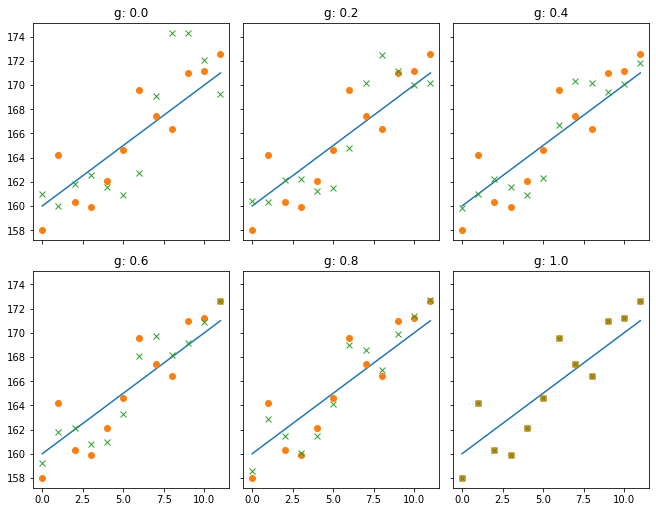

In [60]:
h = 2./3
figure, subplots = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(9, 7), constrained_layout=True)

for raw_g in range(0, 12, 2):
  g = raw_g/10
  plot_number = math.floor(raw_g/2)
  row_index = math.floor(plot_number/3)
  column_index = plot_number % 3
  estimates = g_h_filter(weights, 160, 1, g, h, 1)
  subplots[row_index, column_index].plot(actuals, label='Actual')
  subplots[row_index, column_index].plot(weights, 'o', label='Measurements')
  subplots[row_index, column_index].plot(estimates, 'x', label='Estimates')
  subplots[row_index, column_index].set_title('g: {}'.format(g))
plt.show()